In [22]:
import numpy as np
import copy
import math
#state represent model
#we use state represent checkpoint
#a state has objectlist,fixationlist,objectindex,fixationindex,selectindex
map_size = 10
fixation_left_position = [map_size/2,0]
fixation_right_position = [map_size/2,map_size-1]
fixation_up_position = [0,map_size/2]
fixation_down_position = [map_size-1,map_size/2]
fixation_center_position = [map_size/2,map_size/2]
#object:
#positionX
#positionY
#positionXY = positionX*N+positionY
#shape  0,1,2,3,4
#color  0,1,2,3,4
class ObjectV:
    def __init__(self, positionX, positionY,shape,color):
        self.positionX = positionX
        self.positionY = positionY
        self.shape = shape
        self.color = color

    def getPositionX(self):
        return self.positionX
    
    def getPositionY(self):
        return self.positionY
        
    def setPositionX(self,positionx):
        self.positionX = positionx
        return
    
    def setPositionY(self,positiony):
        self.positionY = positiony
        return
    
    def getShape(self):
        return self.shape
    
    def getColor(self):
        return self.color

class Fixation:
    def __init__(self, positionX, positionY):
        self.positionX = positionX
        self.positionY = positionY
        
    def getPositionX(self):
        return self.positionX
    
    def getPositionY(self):
        return self.positionY

def resortobject(fixation,objectlist):
    distan = []
    lenobj=len(objectlist)
    for i in range(lenobj):
        x = abs(fixation.getPositionX()-objectlist[i].getPositionX())
        y = abs(fixation.getPositionY()-objectlist[i].getPositionY())
        distan.append(math.hypot(x,y))
    npdistan = np.asarray(distan)
    nparg = npdistan.argsort()
    return nparg.tolist()

def resortobjectX(fixation,objectlist):
    distan = []
    lenobj=len(objectlist)
    for i in range(lenobj):
        x = abs(fixation.getPositionX()-objectlist[i].getPositionX())
        y = abs(fixation.getPositionY()-objectlist[i].getPositionY())
        distan.append(x*100+y)
    npdistan = np.asarray(distan)
    nparg = npdistan.argsort()
    return nparg.tolist()

def resortobjectY(fixation,objectlist):
    distan = []
    lenobj=len(objectlist)
    for i in range(lenobj):
        x = abs(fixation.getPositionX()-objectlist[i].getPositionX())
        y = abs(fixation.getPositionY()-objectlist[i].getPositionY())
        distan.append(x+100*y)
    npdistan = np.asarray(distan)
    nparg = npdistan.argsort()
    return nparg.tolist()

def execute(currentState,inst):
    newobjectlist = []
    oldobjectlist = currentState.getCurrentObjectList()
    #oldfixationlist = copy.deepcopy(currentState.getCurrentFixationList())
    #oldobjectindex = copy.deepcopy(currentState.getCurrentIndexList())
    #oldselectindex = currentState.getSelectIndex()
    #oldfixationindex = currentState.getFixationIndex()
    lenobj = len(currentState.objectlist)
    #------------------------
    for i in range(lenobj):
        oldobject_i = oldobjectlist[i]
        newobjectlist.append(
            ObjectV(
                oldobject_i.getPositionX(),
                oldobject_i.getPositionY(),
                oldobject_i.getShape(),
                oldobject_i.getColor()
            )
        )
        #print(type(oldobject_i))
        #positionX = oldobject_i.getPositionX()
        ##positionY = oldobject_i.getPositionY()
        #shape = oldobject_i.getShape()
        #color = oldobject_i.getColor()
        #newobject_i = new ObjectV(positionX,positionY,shape,color)
        #newobjectlist.append(newobject_i)
        #newobjectlist.


#select = 0
#select just change the select index,other copy
    if inst==0:
        #selectindex = oldselectindex[0]
        #create new state
        currentIndexList = copy.deepcopy(currentState.getCurrentIndexList());
        newselectindex = currentIndexList[0]
        newState = State(
            newobjectlist, 
            copy.deepcopy(currentState.getCurrentFixationList()),
            currentIndexList,
            newselectindex,
            currentState.getFixationIndex()
        )
        return newState
#fixate_attend_object = 1
#fixate_previous = 2
#fixate_next = 3
#fixate_location_left = 4
#fixate_location_right = 5
#fixate_location_up = 6
#fixate_location_down = 7
#fixate_location_center = 8
#
#fixation change the fixationlist,fixationindex and re-sort the objectindex
# the current history of fixationlist is calculated by the time fixation add to the list
#debug,fixation make the objectindex resort so the select index should be 0
    elif inst<9:
        newfixationindex = currentState.getFixationIndex()
        newindexlist = []
        newfixationlist = copy.deepcopy(currentState.getCurrentFixationList())
#fixate_attend_object just add fixationlist,change fixationindex and re-sort the objectindex by distance
        if inst==1:
            selectindex = currentState.getSelectIndex()
            object_i = newobjectlist[selectindex]
            newfixation = Fixation(object_i.getPositionX(),object_i.getPositionY())
            newfixationlist.append(newfixation)
            newfixationindex = -1
            newindexlist = resortobject(newfixation,newobjectlist)
#handle fixate_pre/next just change the fixationindex and re-sort the objectindex
        elif inst<4:
            if inst==2:
#pre
                #debug
                #print(len(currentState.getCurrentFixationList()))
                #print(newfixationindex)
                if abs(newfixationindex)<len(currentState.getCurrentFixationList()):
                    newfixationindex-=1
                    currentfixation = currentState.getCurrentFixationList()[newfixationindex]
                    newindexlist = resortobject(currentfixation,newobjectlist)
                else:
                    #print("fixation_pre_error")
                    return
            else:
#next               
                if newfixationindex<-1:
                    newfixationindex+=1
                    currentfixation = currentState.getCurrentFixationList()[newfixationindex]
                    newindexlist = resortobject(currentfixation,newobjectlist)
                else:
                    #print("fixation_next_error")
                    return
#handle fixation location.just add fixationlist,change fixationindex and move the fixationindex to the last
        else:
            if inst == 4:
                newfixation = Fixation(fixation_left_position[0],fixation_left_position[1])
                newfixationlist.append(newfixation)
                newfixationindex = -1
                newindexlist = resortobjectY(newfixation,newobjectlist)
            elif inst == 5:
                newfixation = Fixation(fixation_right_position[0],fixation_right_position[1])
                newfixationlist.append(newfixation)
                newfixationindex = -1
                newindexlist = resortobjectY(newfixation,newobjectlist)
            elif inst == 6:
                newfixation = Fixation(fixation_up_position[0],fixation_up_position[1])
                newfixationlist.append(newfixation)
                newfixationindex = -1
                newindexlist = resortobjectX(newfixation,newobjectlist)
            elif inst == 7:
                newfixation = Fixation(fixation_down_position[0],fixation_down_position[1])
                newfixationlist.append(newfixation)
                newfixationindex = -1
                newindexlist = resortobjectX(newfixation,newobjectlist)
            elif inst == 8:
                newfixation = Fixation(fixation_center_position[0],fixation_center_position[1])
                newfixationlist.append(newfixation)
                newfixationindex = -1
                newindexlist = resortobject(newfixation,newobjectlist)
            
        newState = State(
            newobjectlist, 
            newfixationlist,
            newindexlist,
            #currentState.getSelectIndex(),
            -1,
            newfixationindex
        )
        return newState
#move_to_fixation = 9
#move_left = 10
#move_right = 11
#move_up = 12
#move_down = 13
#
#move just change the selected object and objectlist,and the select index
    elif inst <14:
        #
        selectindex = currentState.getSelectIndex()
        if selectindex<0:
            #cut the dubug message
            #print("move_index_out_of_bound_error")
            return
        object_i = newobjectlist[selectindex]
        newindexlist = copy.deepcopy(currentState.getCurrentIndexList())
#move_to_fixation is a special case,cause the path is irregular
##temp solution
#just move to the position without consider the path
#if the position has an object then return an exception
##else return the new rank
##todo-------------
        if inst == 9:
#check the move is valid
            fixationindex = currentState.getFixationIndex()
            currentfixation = currentState.getCurrentFixationList()[fixationindex]
            
#checkMoveValid(positionX,positionY,newobjectlist)           
            for i in range(len(newobjectlist)):
                if (newobjectlist[i].getPositionX()==currentfixation.getPositionX()):
                    if (newobjectlist[i].getPositionY()==currentfixation.getPositionY()):
                        #cut the dubug message
                        #print("move_to_fixationerror")
                        return
#move to the position of fixation
            object_i.setPositionX(currentfixation.getPositionX())
            object_i.setPositionY(currentfixation.getPositionY())
            dst_x=object_i.getPositionX();
            dst_y=object_i.getPositionY();
# if isfront == 1 ,than move front ,else move back        
            isfront = 1;
            if (object_i.getPositionX()<currentfixation.getPositionX()):
                isfront = 0
            elif (object_i.getPositionX() == currentfixation.getPositionX()):
                if object_i.getPositionY()< currentfixation.getPositionY():
                    isfront = 0

#move front resort is same with move up  
            if (isfront ==1):
                del newobjectlist[selectindex]
                oldselectindex = selectindex
                selectindex=0
                #find the first object bigger than object_i,and insert 
                while selectindex<len(newobjectlist):
                    if (dst_x<newobjectlist[selectindex].getPositionX()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    elif (dst_x == newobjectlist[selectindex].getPositionX()) and (dst_y < newobjectlist[selectindex].getPositionY()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    selectindex+=1
                if selectindex==len(newobjectlist):
                    newobjectlist.insert(selectindex,object_i)
                #re-computer the object index rank,oldselectindex change to selectindex,between oldselectindex and index change to plus 1
                #for i in range(len(newindexlist)):
                #    if (newindexlist[i]<oldselectindex) and (newindexlist[i]>=selectindex):
                #        newindexlist[i]+=1
                #    elif newindexlist[i]==oldselectindex:
                #        newindexlist[i]=selectindex
                newindexlist[0]=selectindex
#move back resort is same with move down
            else:
                del newobjectlist[selectindex]
                oldselectindex = selectindex
                #because become bigger so we can search from selectindex to the finnal
                #find the first object bigger than object_i,and insert 
                while selectindex<len(newobjectlist):
                    if (dst_x<newobjectlist[selectindex].getPositionX()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    elif (dst_x == newobjectlist[selectindex].getPositionX()) and (dst_y < newobjectlist[selectindex].getPositionY()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    selectindex+=1
                if selectindex==len(newobjectlist):
                    newobjectlist.insert(selectindex,object_i)
                #re-computer the object index rank,oldselectindex change to selectindex,between oldselectindex and index change to plus 1
                #for i in range(len(newindexlist)):
                #    if (newindexlist[i]>oldselectindex) and (newindexlist[i]<=selectindex):
                #        newindexlist[i]-=1
                #    elif newindexlist[i]==oldselectindex:
                #        newindexlist[i]=selectindex
                newindexlist[0]=selectindex
    #move_left,doesn't change rank
        elif inst == 10:
            if selectindex==0:
                object_i.setPositionY(0)
            else:
                dst_x=object_i.getPositionX();
                cmp_x=newobjectlist[selectindex-1].getPositionX();
                if cmp_x<dst_x:
                    object_i.setPositionY(0)
                else:
                    cmp_y=newobjectlist[selectindex].getPositionY();
                    object_i.setPositionY(cmp_y+1)
    #move_right,doesn't change rank
        elif inst == 11:
            if selectindex==(len(newobjectlist)-1):
                object_i.setPositionY(map_size-1)
            else:
                dst_x=object_i.getPositionX();
                cmp_x=newobjectlist[selectindex+1].getPositionX();
                if cmp_x>dst_x:
                    object_i.setPositionY(map_size-1)
                else:
                    cmp_y=newobjectlist[selectindex].getPositionY();
                    object_i.setPositionY(cmp_y-1)
    #move_up,maybe change rank,become smaller
        elif inst == 12:
            #if is the first,just move to top
            if selectindex==0:
                object_i.setPositionX(0)
            #if not first,try move up
            else:
                dst_x=object_i.getPositionX();
                dst_y=object_i.getPositionY();
                dst_index = selectindex;
                #back to front find the first same y
                while (dst_index)>0:
                    dst_index-=1
                    cmp_y = newobjectlist[dst_index].getPositionY();
                    if (cmp_y==dst_y):
                        break
                #if find same y,then change x to theX + 1
                if dst_y == newobjectlist[dst_index].getPositionY():
                    dst_x = newobjectlist[dst_index].getPositionX()+1
                #if not find same y,then change x to 0,and resort later
                else:
                    dst_x = 0;
                #resort,first delete itself
                object_i.setPositionX(dst_x)
                del newobjectlist[selectindex]
                oldselectindex = selectindex
                selectindex=0
                #find the first object bigger than object_i,and insert 
                while selectindex<len(newobjectlist):
                    if (dst_x<newobjectlist[selectindex].getPositionX()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    elif (dst_x == newobjectlist[selectindex].getPositionX()) and (dst_y < newobjectlist[selectindex].getPositionY()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    selectindex+=1
                if selectindex==len(newobjectlist):
                    newobjectlist.insert(selectindex,object_i)
                #re-computer the object index rank,oldselectindex change to selectindex,between oldselectindex and index change to plus 1
                #for i in range(len(newindexlist)):
                #    if (newindexlist[i]<oldselectindex) and (newindexlist[i]>=selectindex):
                #        newindexlist[i]+=1
                #    elif newindexlist[i]==oldselectindex:
                #        newindexlist[i]=selectindex
                newindexlist[0]=selectindex
    #move_down,maybe change rank,become bigger
        else:
            #if is the last,just move to down
            if selectindex==len(newobjectlist)-1:
                object_i.setPositionX(map_size-1)
            #if not first,try move up
            else:
                dst_x=object_i.getPositionX();
                dst_y=object_i.getPositionY();
                dst_index = selectindex;
                #front to back find the first same y
                while (dst_index)<len(newobjectlist)-1:
                    dst_index+=1
                    cmp_y = newobjectlist[dst_index].getPositionY();
                    if (cmp_y==dst_y):
                        break
                #if find same y,then change x to theX - 1
                if dst_y == newobjectlist[dst_index].getPositionY():
                    dst_x = newobjectlist[dst_index].getPositionX()-1
                #if not find same y,then change x to 0,and resort later
                else:
                    dst_x = map_size-1;
                #resort,first delete itself
                object_i.setPositionX(dst_x)
                del newobjectlist[selectindex]
                oldselectindex = selectindex
                #-------selectindex=0 .
                #because become bigger so we can search from selectindex to the finnal
                #find the first object bigger than object_i,and insert 
                while selectindex<len(newobjectlist):
                    if (dst_x<newobjectlist[selectindex].getPositionX()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    elif (dst_x == newobjectlist[selectindex].getPositionX()) and (dst_y < newobjectlist[selectindex].getPositionY()):
                        newobjectlist.insert(selectindex,object_i)
                        break
                    selectindex+=1
                if selectindex==len(newobjectlist):
                    newobjectlist.insert(selectindex,object_i)
                #re-computer the object index rank,oldselectindex change to selectindex,between oldselectindex and index change to plus 1
                #for i in range(len(newindexlist)):
                #    if (newindexlist[i]>oldselectindex) and (newindexlist[i]<=selectindex):
                #        newindexlist[i]-=1
                #    elif newindexlist[i]==oldselectindex:
                #        newindexlist[i]=selectindex
                newindexlist[0]=selectindex
        ##finally get the new state
        newState = State(
            newobjectlist, 
            copy.deepcopy(currentState.getCurrentFixationList()),
            newindexlist,
            selectindex,
            currentState.getFixationIndex()
        )
        return newState
#next_object = 14
#next_object just change the indexlist(remove the first index of the list)
    elif inst==14:
        currentIndexList = copy.deepcopy(currentState.getCurrentIndexList());
        if len(currentIndexList)>0:
            del currentIndexList[0]
            newState = State(newobjectlist,copy.deepcopy(currentState.getCurrentFixationList()),currentIndexList,currentState.getSelectIndex(),currentState.getFixationIndex())
            return newState
        #else:
            #print("next_object_error")
    else:
        print("insterror: "+inst)
    return
#compare 
#if currentState = outputState return 0
#if currentState != outputState return 1
#if currentState.objectnumber !=outputState.objectnumber or other wired happends return -1

#should write in class State. But python3 cancel __cmp__ method..what a pity. 
def compare(currentState,outputState):
    currentObjectlist = currentState.getCurrentObjectList()
    outputObjectlist = outputState.getCurrentObjectList()
    if len(currentObjectlist)!=len(outputObjectlist):
        return -1
    leng = len(currentObjectlist)
    
    #this part of code should rewrite in the future
    for i in range(leng):
        if currentObjectlist[i].getPositionX()!=outputObjectlist[i].getPositionX():
            #print("diffX in %d,current is %d,output is %d" % (i,currentObjectlist[i].getPositionX(),outputObjectlist[i].getPositionX())) 
            return 1
        if currentObjectlist[i].getPositionY()!=outputObjectlist[i].getPositionY():
            #print("diffY in %d" % i)
            return 1
        if currentObjectlist[i].getShape()!=outputObjectlist[i].getShape():
            #print("diffshape in %d" % i)
            return 1
        if currentObjectlist[i].getColor()!=outputObjectlist[i].getColor():
            #print("diffcolor in %d" % i)
            return 1
    return 0
def compare_with_log(currentState,outputState):
    currentObjectlist = currentState.getCurrentObjectList()
    outputObjectlist = outputState.getCurrentObjectList()
    if len(currentObjectlist)!=len(outputObjectlist):
        return -1
    leng = len(currentObjectlist)
    
    #this part of code should rewrite in the future
    for i in range(leng):
        if currentObjectlist[i].getPositionX()!=outputObjectlist[i].getPositionX():
            print("diffX in %d,current is %d,output is %d" % (i,currentObjectlist[i].getPositionX(),outputObjectlist[i].getPositionX())) 
            return 1
        if currentObjectlist[i].getPositionY()!=outputObjectlist[i].getPositionY():
            print("diffY in %d" % i)
            return 1
        if currentObjectlist[i].getShape()!=outputObjectlist[i].getShape():
            print("diffshape in %d" % i)
            return 1
        if currentObjectlist[i].getColor()!=outputObjectlist[i].getColor():
            print("diffcolor in %d" % i)
            return 1
    return 0

#state:
#object list[]
#fixation list[]
#index list[]
#selectIndex
#seqence []
class State:
    def __init__(self, objectlist, fixationlist,indexlist,selectIndex,fixationIndex):
        self.objectlist = objectlist
        self.fixationlist = fixationlist
        self.indexlist = indexlist
        self.selectIndex = selectIndex;
        self.fixationIndex = fixationIndex;
        
    def getFixationIndex(self):
        return self.fixationIndex;
    
    def getSelectIndex(self):
        return self.selectIndex;
    
    def setFixationIndex(self,fixationindex):
        self.fixationIndex = fixationindex;
        return
    
    def setSelectIndex(self,selectindex):
        self.selectIndex = selectindex;
        return
    
    def getCurrentFixation(self):
        return self.fixationlist[self.fixationIndex]
    
    def getCurrentFixationList(self):
        return self.fixationlist
    
    def clearCurrentFixationList(self):
        self.fixationlist = []
        
    def getCurrentObjectList(self):
        return self.objectlist
    
    def getCurrentIndexList(self):
        return self.indexlist

def main():
    #testX()
    test0()
    test1()
    test2()
    test3()
    test4()
    test5()
    test6()
    test7()
    test8()
    test9()
    test10()
    test11()
    test12()
    test13()
    test14()

def testX():
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    
    outputobjectlist = []
    object1_1 = ObjectV(1,1,"circle","red")
    object2_2 = ObjectV(0,2,"circle","yellow")
    outputobjectlist.append(object2_2)
    outputobjectlist.append(object1_1)    
    outputState = State(outputobjectlist,[],[],-1,-1)
    #default indexlist is fixation_location_center
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #print(mid0State.getSelectIndex())
    #origin testX {0,12]
    #program [select,move_up] [0,12]
    mid1State = execute(mid0State,0)
    mid2State = execute(mid1State,12)
    print(compare(mid2State,outputState))

    #currentObjectlist = mid2State.getCurrentObjectList()
    #print(currentObjectlist[0].getPositionX())
    #print(currentObjectlist[0].getPositionY())
    #print(currentObjectlist[1].getPositionX())
    #print(currentObjectlist[1].getPositionY())
    #outputObjectlist = outputState.getCurrentObjectList()
    #print(outputObjectlist[0].getPositionX()*outputObjectlist[0].getPositionY())
 

#select = 0
#功能：选中当前待选中物体
#物体[(1,1),(2,2)]
#程序[0]
#Assert：当前选中的物体是（2，2）
def test0():
    print("test0 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #program
    currentState = execute(mid0State,0)
    #assert
    selectindex = currentState.getSelectIndex()
    object_i = currentState.getCurrentObjectList()[selectindex]
    if (object_i.getPositionX()!=2):
        print("select object X fault")
    if (object_i.getPositionY()!=2):
        print("select object Y fault")
    print("test0 end")
    
#fixate_attend_object = 1
#功能：将fixation转移到当前物体坐标上
#物体[(1,1),(2,2)]
#选中（2，2）
#程序[1]
#Assert：当前fixation是(2,2)
def test1():    
    print("test1 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    mid1State = execute(mid0State,0)
    #program
    currentState = execute(mid1State,1)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=2):
        print("test1 X fault")
    if (currentfixation.getPositionY()!=2):
        print("test1 Y fault")
    print("test1 end")

#fixate_previous = 2
#物体[(1,1),(2,2)]
#Fixationlist[center,left,right]
#程序1[2]
#Assert：当前fixation是left
#程序2[2,2]
#Assert：当前fixation是center
def test2():    
    print("test2 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    
    mid1State = execute(mid0State,8)
    #print(len(mid1State.getCurrentFixationList()))
    mid2State = execute(mid1State,4)
    #print(len(mid2State.getCurrentFixationList()))
    mid3State = execute(mid2State,5)
    #print(len(mid3State.getCurrentFixationList()))
    #program2_1
    currentState_1 = execute(mid3State,2)
    #assert
    fixationindex = currentState_1.getFixationIndex()
    currentfixation = currentState_1.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=5):
        print("test2_1 X fault")
    if (currentfixation.getPositionY()!=0):
        print("test2_1 Y fault")
    #program2_2
    currentState_2 = execute(currentState_1,2)
    fixationindex = currentState_2.getFixationIndex()
    currentfixation = currentState_2.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=5):
        print("test2_1 X fault")
    if (currentfixation.getPositionY()!=5):
        print("test2_1 Y fault")
    print("test2 end")
    
#fixate_next = 3
#物体[(1,1),(2,2)]
#Fixation(center,left,right)
#Fixationindex -3
#程序1[3]
#Assert：当前fixation是left
def test3():    
    print("test3 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    
    mid1State = execute(mid0State,8)
    #print(len(mid1State.getCurrentFixationList()))
    mid2State = execute(mid1State,4)
    #print(len(mid2State.getCurrentFixationList()))
    mid3State = execute(mid2State,5)
    #print(len(mid3State.getCurrentFixationList()))
    mid3State.setFixationIndex(-3)
    #program
    currentState = execute(mid3State,3)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=5):
        print("test3 X fault")
    if (currentfixation.getPositionY()!=0):
        print("test3 Y fault")
    print("test3 end")

#fixate_location_left = 4
#物体[(1,1),(5,2)]
#程序[4]
#Assert：indexlist排序顺序 [1,2]
#Fixationlist最后一位:left
def test4():    
    print("test4 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(5,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid0State,4)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=5):
        print("test4 fixation X fault")
    if (currentfixation.getPositionY()!=0):
        print("test4 fixation Y fault")
    currentIndexList = currentState.getCurrentIndexList()
    if (currentIndexList[0]!=0):
        print("test4 index0 fault")
    if (currentIndexList[1]!=1):
        print("test4 index1 fault")
    #print(currentIndexList)
    print("test4 end")
    
#fixate_location_right = 5
#物体[(1,8),(5,7)]
#程序[5]
#Assert：indexlist排序顺序 [0,1]
#Fixationlist最后一位:right
def test5():    
    print("test5 start")
    inputobjectlist = []
    object1 = ObjectV(1,8,"circle","red")
    object2 = ObjectV(5,7,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid0State,5)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=5):
        print("test5 fixation X fault")
    if (currentfixation.getPositionY()!=9):
        print("test5 fixation Y fault")
    currentIndexList = currentState.getCurrentIndexList()
    if (currentIndexList[0]!=0):
        print("test5 index0 fault")
    if (currentIndexList[1]!=1):
        print("test5 index1 fault")
    #print(currentIndexList)
    print("test5 end")
    
#fixate_location_up = 6
#物体[(2,1),(3,5)]
#程序[6]
#Assert：indexlist排序顺序 [0,1]
#Fixationlist最后一位Up
def test6():    
    print("test6 start")
    inputobjectlist = []
    object1 = ObjectV(2,1,"circle","red")
    object2 = ObjectV(3,5,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid0State,6)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=0):
        print("test6 fixation X fault")
    if (currentfixation.getPositionY()!=5):
        print("test6 fixation Y fault")
    currentIndexList = currentState.getCurrentIndexList()
    if (currentIndexList[0]!=0):
        print("test6 index0 fault")
    if (currentIndexList[1]!=1):
        print("test6 index1 fault")
    #print(currentIndexList)
    print("test6 end")

#fixate_location_down = 7
#物体[(7,5),(8,1)]
#程序[7]
#Assert：indexlist排序顺序 [1,0]
#Fixationlist最后一位Down
def test7():    
    print("test7 start")
    inputobjectlist = []
    object1 = ObjectV(7,5,"circle","red")
    object2 = ObjectV(8,1,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid0State,7)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=9):
        print("test7 fixation X fault")
    if (currentfixation.getPositionY()!=5):
        print("test7 fixation Y fault")
    currentIndexList = currentState.getCurrentIndexList()
    if (currentIndexList[0]!=1):
        print("test7 index0 fault")
    if (currentIndexList[1]!=0):
        print("test7 index1 fault")
    #print(currentIndexList)
    print("test7 end")
    
#fixate_location_center = 8
#物体[(1,1),(2,2)]
#程序[8]
#Assert：indexlist排序顺序 [1,0]
#Fixationlist最后一位Center
def test8():    
    print("test8 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid0State,8)
    #assert
    fixationindex = currentState.getFixationIndex()
    currentfixation = currentState.getCurrentFixationList()[fixationindex]
    if (currentfixation.getPositionX()!=5):
        print("test8 fixation X fault")
    if (currentfixation.getPositionY()!=5):
        print("test8 fixation Y fault")
    currentIndexList = currentState.getCurrentIndexList()
    if (currentIndexList[0]!=1):
        print("test8 index0 fault")
    if (currentIndexList[1]!=0):
        print("test8 index1 fault")
    #print(currentIndexList)
    print("test8 end")
    
#move_to_fixation = 9
#物体[(1,1),(2,2),(4,4),(6,7)]
#Fixation((5,5))
#Selectindex 1
#程序[9]
#Oldindexlist(2,3,1,0)
#Next,next之后是[1,0]
#Assert：物体 (1,1),(4,4),(5,5),(6,7)
#变成[2,0]
#indexlist排序顺序 [2 ,0]
def test9():    
    print("test9 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    object3 = ObjectV(4,4,"circle","red")
    object4 = ObjectV(6,7,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputobjectlist.append(object3)
    inputobjectlist.append(object4)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    #mid0State.clearCurrentFixationList()
    oldlist = [2,3,1,0]
    oldnowlist = mid0State.getCurrentIndexList()
    if (oldlist!=oldnowlist):
        print("test9 oldlist fault:")
        print(oldlist)
        print(oldnowlist)
    
    #print(mid0State.getSelectIndex())
    mid1State = execute(mid0State,14)
    #print(mid1State.getSelectIndex())
    mid2State = execute(mid1State,14)
    #print(mid2State.getSelectIndex())
    mid3State = execute(mid2State,0)
    #program
    currentState = execute(mid3State,9)
    #assert
    ObjectList = currentState.getCurrentObjectList()
    if (ObjectList[0].getPositionX()!=1):
        print("test9 object0 X fault")
    if (ObjectList[0].getPositionY()!=1):
        print("test9 object0 Y fault")
    if (ObjectList[1].getPositionX()!=4):
        print("test9 object1 X fault")
    if (ObjectList[1].getPositionY()!=4):
        print("test9 object1 Y fault")
    if (ObjectList[2].getPositionX()!=5):
        print("test9 object2 X fault")
    if (ObjectList[2].getPositionY()!=5):
        print("test9 object2 Y fault")
    if (ObjectList[3].getPositionX()!=6):
        print("test9 object3 X fault")
    if (ObjectList[3].getPositionY()!=7):
        print("test9 object3 Y fault")
    #print(ObjectList[0].getPositionX())
    #print(ObjectList[0].getPositionY())
    currentIndexList = currentState.getCurrentIndexList()
    newlist = [2,0]
    if (newlist!=currentIndexList):
        print("test9 newlist fault:")
        print(newlist)
        print(currentIndexList)
    print("test9 end")

#move_to_fixation = 9
#物体[(1,1),(2,2),(4,4),(6,7)]
#Fixation((5,5))
#Selectindex 1
#程序[9]
#Oldindexlist(2,3,1,0)
#Next,next之后是[1,0]
#Assert：物体 (1,1),(4,4),(5,5),(6,7)
#变成[2,0]
#indexlist排序顺序 [2 ,0]
def test9plus():    
    print("test9plus start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    object3 = ObjectV(4,4,"circle","red")
    object4 = ObjectV(6,7,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputobjectlist.append(object3)
    inputobjectlist.append(object4)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    #mid0State.clearCurrentFixationList()
    oldlist = [2,3,1,0]
    oldnowlist = mid0State.getCurrentIndexList()
    if (oldlist!=oldnowlist):
        print("test9 oldlist fault:")
        print(oldlist)
        print(oldnowlist)
    
    #print(mid0State.getSelectIndex())
    mid1State = execute(mid0State,14)
    #print(mid1State.getSelectIndex())
    mid2State = execute(mid1State,14)
    #print(mid2State.getSelectIndex())
    mid3State = execute(mid2State,0)
    #program
    currentState = execute(mid3State,9)
    #assert
    ObjectList = currentState.getCurrentObjectList()
    if (ObjectList[0].getPositionX()!=1):
        print("test9 object0 X fault")
    if (ObjectList[0].getPositionY()!=1):
        print("test9 object0 Y fault")
    if (ObjectList[1].getPositionX()!=4):
        print("test9 object1 X fault")
    if (ObjectList[1].getPositionY()!=4):
        print("test9 object1 Y fault")
    if (ObjectList[2].getPositionX()!=5):
        print("test9 object2 X fault")
    if (ObjectList[2].getPositionY()!=5):
        print("test9 object2 Y fault")
    if (ObjectList[3].getPositionX()!=6):
        print("test9 object3 X fault")
    if (ObjectList[3].getPositionY()!=7):
        print("test9 object3 Y fault")
    #print(ObjectList[0].getPositionX())
    #print(ObjectList[0].getPositionY())
    currentIndexList = currentState.getCurrentIndexList()
    newlist = [2,0]
    if (newlist!=currentIndexList):
        print("test9 newlist fault:")
        print(newlist)
        print(currentIndexList)
    print("test9plus end")
    
#move_left = 10
#物体[(1,1),(2,2)]
#Fixation(center)
#Selectindex 0
#程序[10]
#Assert：物体 (1,0),(2,2) 
def test10():    
    print("test10 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    mid1State = execute(mid0State,14)
    mid2State = execute(mid1State,0)
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid2State,10)
    #assert
    ObjectList = currentState.getCurrentObjectList()
    if (ObjectList[0].getPositionX()!=1):
        print("test10 object0 X fault")
    if (ObjectList[0].getPositionY()!=0):
        print("test10 object0 Y fault")
    if (ObjectList[1].getPositionX()!=2):
        print("test10 object1 X fault")
    if (ObjectList[1].getPositionY()!=2):
        print("test10 object1 Y fault")
    #print(currentIndexList)
    print("test10 end")

#move_right = 11
#物体[(1,1),(2,2)]
#Fixation(center)
#Selectindex 0
#程序[11]
#Assert：物体 (1,9),(2,2)
def test11():    
    print("test11 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    mid1State = execute(mid0State,14)
    mid2State = execute(mid1State,0)
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid2State,11)
    #assert
    ObjectList = currentState.getCurrentObjectList()
    if (ObjectList[0].getPositionX()!=1):
        print("test11 object0 X fault")
    if (ObjectList[0].getPositionY()!=9):
        print("test11 object0 Y fault")
    if (ObjectList[1].getPositionX()!=2):
        print("test11 object1 X fault")
    if (ObjectList[1].getPositionY()!=2):
        print("test11 object1 Y fault")
    #print(currentIndexList)
    print("test11 end")

#move_up = 12
#物体[(1,1),(2,2)]
#Fixation(center)
#Selectindex 0
#程序[12]
#Assert：物体 (0,1),(2,2)
def test12():    
    print("test12 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    mid1State = execute(mid0State,14)
    mid2State = execute(mid1State,0)
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid2State,12)
    #assert
    ObjectList = currentState.getCurrentObjectList()
    if (ObjectList[0].getPositionX()!=0):
        print("test12 object0 X fault")
    if (ObjectList[0].getPositionY()!=1):
        print("test12 object0 Y fault")
    if (ObjectList[1].getPositionX()!=2):
        print("test12 object1 X fault")
    if (ObjectList[1].getPositionY()!=2):
        print("test12 object1 Y fault")
    #print(currentIndexList)
    print("test12 end")

#move_down = 13
#物体[(1,1),(2,2)]
#Fixation(center)
#Selectindex 0
#程序[13]
#Assert：物体 (2,2) ,(9,1)   
def test13():    
    print("test13 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    mid1State = execute(mid0State,14)
    mid2State = execute(mid1State,0)
    #print(mid0State.getCurrentIndexList())
    #program
    currentState = execute(mid2State,13)
    #assert
    ObjectList = currentState.getCurrentObjectList()
    if (ObjectList[0].getPositionX()!=2):
        print("test13 object0 X fault")
    if (ObjectList[0].getPositionY()!=2):
        print("test13 object0 Y fault")
    if (ObjectList[1].getPositionX()!=9):
        print("test13 object1 X fault")
    if (ObjectList[1].getPositionY()!=1):
        print("test13 object1 Y fault")
    #print(currentIndexList)
    print("test13 end")

#next_object = 14
#物体[(1,1),(2,2)]
#Fixation(center)
#indexlist[1，0]
#程序[14]
#Assert: indexlist [0]   
def test14():    
    print("test14 start")
    inputobjectlist = []
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    oldlist = [1,0]
    oldnowlist = mid0State.getCurrentIndexList()
    if (oldlist!=oldnowlist):
        print("test14 oldlist fault:")
        print(oldlist)
        print(oldnowlist)
    currentState = execute(mid0State,14)
    #assert
    newlist = [0]
    currentIndexList = currentState.getCurrentIndexList()
    if (newlist!=currentIndexList):
        print("test14 newlist fault:")
        print(newlist)
        print(currentIndexList)
    #print(currentIndexList)
    print("test14 end")

#main()
#print(inst_num)

In [23]:
import numpy.matlib 
import numpy as np 
import json

SAVE_FILE ="data.json"
U1_OPT= 0
U2_OPT= 0
inst_num = 15
#MarkovT = [[0 for i in range(n)] for j in range(m)]
#MarkovCount = [[0 for i in range(n)] for j in range(m)]
MarkovT = np.matlib.zeros((inst_num,inst_num),dtype = float) 
MarkovCount = np.matlib.ones((inst_num,inst_num),dtype = int)
SumVector = np.matlib.ones((inst_num,),dtype = int)
startList = [0,4,5,6,7,8,14]
programCount = 0;
bestLength = 7;
#WeightMatrix = np.matlib.identity(n, dtype =  float)
#
searchOutputState=State([],[],[],-1,-1);
searchInputState =State([],[],[],-1,-1);
def init():
    #fixate_location no twice
    for i in range(4,9):
        for j in range(4,9):
            MarkovCount[i,j]=0;
    #fixate index no previous plus next
    MarkovCount[3,4]=0;
    MarkovCount[4,3]=0;
    #select no twice
    MarkovCount[0,0]=0;
    
    #updateMarkovT()
    #fake program
    #program = [0,1,0,1,2,7];
    #updateCountMarkov(program);
    #readMarkov()
    
def printMarkovT():
    global n
    for i in range(n):
        print(MarkovT[i])
    return

#def BestFirstSearch():
#    pass    

#def greedyDFS():
#    pass
def U1_Check_search(program):
    global searchInputState
    global searchOutputState
    global bestLength
    for i in range(len(program)):
        midState = searchInputState
        #print("U1")
        try:
            for j in range(len(program)):
                if (i!=j):
                    #print(program[j])
                    midState = execute(midState,program[j])
        except:
            continue
        else:
            #print("U1_Check_search")
            if (midState is None):
                continue
            if (compare(midState,searchOutputState)==0):
                print("U1find a solution")
                soluProgram = program
                soluProgram.pop(i)
                print(soluProgram)
                if (len(soluProgram)<bestLength):
                    bestLength = len(soluProgram)
                #updateCountMarkov(soluProgram)
                U1_Check_search(soluProgram)
                return
    return

def U2_Check_search(program):
    global U2InputState
    global U2OutputState
    
    midState = U2InputState
    #print("U2")
    try:
        for i in range(len(program)):
            midState = execute(midState,program[i])
    except:
        return 0
    else:
        if (midState is None):
            return 0
        if (compare_with_log(midState,U2OutputState)==0):
            #print("U2 pass a test")    
            return 1
    return 0
    
    
def search(currentProgram,inputState):
    #print(currentProgram);
    currentInst = currentProgram[-1];
    global programCount
    global bestLength
    global U1_OPT
    global U2_OPT
    #if len(currentProgram)>5:
    #    programCount+=1;
    #    return;
    if (len(currentProgram)>bestLength):
        return;
    #if len(currentProgram)>1:
    #    if syntaxcheck(currentProgram)<1:
    #        return;
    #output = execute(input,currentProgram);
    #if compare(output,finaloutput):
        #do sth
    #    return;
    
    try:
        output = execute(inputState,currentInst)
    except:
        return
    else:
        outputState = output    
        
        if (output is None):
            return

            
        programCount+=1
        global searchOutputState
        if (compare(output,searchOutputState)==0):
            
            print("find a possible solution")                
            soluProgram = currentProgram
            print(soluProgram)
            if (U2_OPT>0):
                print('U2_Checking')
                PassU2 = U2_Check_search(soluProgram)
                if (PassU2>0):
                    print("find a solution")
                else:
                    return
            updateCountMarkov(soluProgram)
            if (len(soluProgram)<bestLength):
                bestLength = len(soluProgram) 
            if (U1_OPT>0):
                U1_Check_search(soluProgram)
            
            return;
        
        
    #---------new inst--------
        countList = MarkovCount[:,currentInst].T;
        argList = numpy.argsort(-countList);
    
    #------------------
    #print(argList[0,0]);
    #global n
    #for i in range(n):
        global inst_num
        for i in range(inst_num):
            search(currentProgram+([argList[0,i]]),output);
    #print(argList[0]);
        return;


def syntaxcheck(program):
    if MarkovCount[program[-1],program[-2]]<1:
        return 0;
    
    #fixate_previous must has previous (count inst2 < inst1+inst 4-8 + inst3)
    if program[-1]==2:
        if program.count(2)>=program.count(1)+program.count(3)+program.count(4)+program.count(5)+program.count(6)+program.count(7)+program.count(8):
            return 0;
        
    #fixate_next must has next (count inst3 < count inst2)
    if program[-1]==3:
        if program.count(3)>program.count(2):
            return 0;
        
    #select before move (count inst0 > 1 before inst9-13 )
    if program[-1]>=9 and program[-1]<=13:
        if program.count(0)<1:
            return 0;
        
    #select before fixation_attend_object (count inst0 > 1 before inst 1)
    if program[-1]==1:
        if program.count(0)<1:
            return 0;
        
   
    
    #-----next object maybe need next(not handle in syntax)-----------
    
    #-----------------not syntacheck part ,below is cut search branch---------------
    
    #fixation_location must change location and shouldn't after change fixation(inst 4-8 not after inst inst 1-8)
    if program[-1]>=4 and program[-1]<=8:
        if program[-2]>1 and program[-2]<=8:
            return 0;
        
    #select not after select
    if program[-1]==0:
        if program[-2]==0:
            return 0;
    #fixate_attend not after fixate_attend
    if program[-1]==1:
        if program[-2]==1:
            return 0;
    #move not after move same
    if program[-1]>=9 and program[-1]<=13:
        if program[-2]==program[-1]:
            return 0;
    return 1;
    
#def printColorImage():
#    pass

#def printShapeImage():
#    pass

def fakeMarkovInit():
    #for i in range(n):
    #   print(MarkovT[i])
    #print("tFakeInit:")
    #print(MarkovT);
    #print("countFakeInit")
    #for i in range(n):
    #    MarkovCount[i]=MarkovT[i]+1;
    print(MarkovCount)
    return
    
def updateCountMarkov(program):
    length = len(program)
    if (length>1):
        for i in range(length-1):
            seq=program[i:i+2]
            #print(MarkovCount[2,1]);
            MarkovCount[seq[1],seq[0]]+=1;       
    updateMarkovT()
    return
    
def updateMarkovT():
    SumMatrix=np.dot(SumVector,MarkovCount);
    #print(SumMatrix);
    #print(SumMatrix[0,0]);
    for i in range(inst_num):
        MarkovT[:,i] = MarkovCount[:,i]/SumMatrix[0,i];
    #print(MarkovT);
    return

def saveMarkov():
    data = {'Markovdata':MarkovCount.tolist()}
    
    json_str = json.dumps(data)
    with open(SAVE_FILE,'w') as f:
        f.write(json_str)
    return

def readMarkov():
    #data = {'Markovdata':MarkovCount.tolist()}
    #
    #json_str = json.dumps(data)
    with open(SAVE_FILE,'r') as f:
        data = json.load(f)
    readCount=np.mat(data['Markovdata'])

    print(readCount)
    global MarkovCount
    MarkovCount = readCount
    return
    #pass

def main():
    readMarkov()
    
    #init()
    #saveMarkov()
    #return
    #test9----------
    inputobjectlist = []
    '''
    object1 = ObjectV(1,1,"circle","red")
    object2 = ObjectV(2,2,"circle","yellow")
    object3 = ObjectV(4,4,"circle","red")
    object4 = ObjectV(6,7,"circle","yellow")
    '''
    
    object1 = ObjectV(1,5,"circle","red")
    object2 = ObjectV(2,6,"circle","yellow")
    object3 = ObjectV(4,4,"circle","red")
    object4 = ObjectV(6,7,"circle","yellow")
    inputobjectlist.append(object1)
    inputobjectlist.append(object2)
    inputobjectlist.append(object3)
    inputobjectlist.append(object4)
    inputState = State(inputobjectlist,[],[],-1,-1)
    mid0State = execute(inputState,8)
    mid0State.clearCurrentFixationList()
    #searchInitState = mid0State()
   	#[8,14,14,0,9]
    #[6, 0, 11, 14, 0, 10]
    outputobjectlist = []
    '''
    object5 = ObjectV(1,1,"circle","red")
    object6 = ObjectV(4,4,"circle","red")
    object7 = ObjectV(5,5,"circle","yellow")
    object8 = ObjectV(6,7,"circle","yellow")
    '''    
    object5 = ObjectV(1,9,"circle","red")
    object6 = ObjectV(2,0,"circle","yellow")
    object7 = ObjectV(4,4,"circle","red")
    object8 = ObjectV(6,7,"circle","yellow")
    
    outputobjectlist.append(object5)
    outputobjectlist.append(object6)
    outputobjectlist.append(object7)
    outputobjectlist.append(object8)
    outputState = State(outputobjectlist,[],[],-1,-1)
    #init clip opt
    global U1_OPT
    U1_OPT= 1
    global searchInputState
    searchInputState = mid0State
    global searchOutputState
    searchOutputState = outputState
    
    #init ambiguity opt
    global U2_OPT
    U2_OPT= 1
    global U2InputState
    U2inputobjectlist = []
    object9 = ObjectV(1,3,"circle","red")
    object10 = ObjectV(2,6,"circle","yellow")
    object11 = ObjectV(5,8,"circle","red")
    object12 = ObjectV(7,4,"circle","yellow")   
    U2inputobjectlist.append(object9)
    U2inputobjectlist.append(object10)
    U2inputobjectlist.append(object11)
    U2inputobjectlist.append(object12)
    U2InputState = State(U2inputobjectlist,[],[],-1,-1)
    U2InputState = execute(U2InputState,8)
    U2InputState.clearCurrentFixationList()
    global U2OutputState
    U2outputobjectlist = []
    object13 = ObjectV(1,9,"circle","red")
    object14 = ObjectV(2,0,"circle","yellow")
    object15 = ObjectV(5,8,"circle","red")
    object16 = ObjectV(7,4,"circle","yellow")   
    U2outputobjectlist.append(object13)
    U2outputobjectlist.append(object14)
    U2outputobjectlist.append(object15)
    U2outputobjectlist.append(object16)
    U2OutputState = State(U2outputobjectlist,[],[],-1,-1)
    
    
    #mid1State = execute(mid0State,6)
    #print(mid1State.getCurrentIndexList())
    #mid2State = execute(mid1State,0)
    #print(mid2State.getCurrentIndexList())
    #mid3State = execute(mid2State,14)
    
    #mid4State = execute(mid3State,11)
    #mid5State = execute(mid4State,0)
    #mid6State = execute(mid5State,10)
    #mid7State = execute(mid6State,11)
    #debug part-----------
    #print("check")
    #Objectlist = mid4State.getCurrentObjectList()
    
    #for object_i in Objectlist:
    #    print(object_i.getPositionX())
    #    print(object_i.getPositionY())
    #    print(object_i.getColor())
    
    #print(compare(mid6State,outputState))
    #------------
    
    for i in startList:
        search([i],mid0State);
    print(programCount);
    #U1_Check_search([0, 6, 0, 11, 14, 0, 10])
    saveMarkov()
    readMarkov()
    return
    #fakeMarkovInit();
    
#print("main")
#printMarkovT()
main()
#init();
#saveMarkov()
#readMarkov()

[[ 1  1  1  1  1  1 10  1  1  1  1  4  1  1  7]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  4  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [10  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 7  1  1  1  1  1  1  1  1  1  1  1  1  1  4]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
 [ 4  1  1  1  1  1  1  1  1  1  1  7  1  1  1]]
find a possible solution
[0, 6, 0, 11, 14, 0, 10]
U2_Checking
U2
U2 pass a test
find a solution
U1find a solution
[6, 0, 11, 14, 0, 10]
find a possible solution
[6, 0, 11, 14, 0, 10]
U2_Checking
U2
U2 pass a test
find a solution
find a possible solution
[6, 0, 14, 11, 0, 10]
U2_

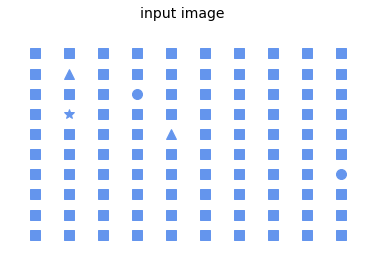

In [70]:
from six import iteritems
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

points = np.ones(1)  # Draw 3 points for each line
marker_style = dict(linestyle=':', color='cornflowerblue', markersize=10)
column = 10;
shapeMatrix = [
    [0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0],
    [0,0,0,2,0,0,0,0,0,0],
    [0,3,0,0,0,0,0,0,0,0],
    [0,0,0,0,1,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,2,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0]
]
shapeMatrixR =[
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s'],
    ['s','s','s','s','s','s','s','s','s','s']
]
shapes=['s','^','o','*']

def format_axes(ax):
    ax.margins(0.1)
    ax.set_axis_off()

def nice_repr(text):
    return repr(text).lstrip('u')

def split_list(a_list):
    #i_half = len(a_list) // 2
    #print((a_list[:i_half], a_list[i_half:]))
    for x in range(column):
        for y in range(column):
            #print(x)
            #print(y)
            shapeMatrixR[y][column-1-x]=shapes[shapeMatrix[x][y]]
    #print(shapeMatrixR)
    return tuple(shapeMatrixR)
    #return(shapeMatrix[0],shapeMatrix[1],shapeMatrix[2],shapeMatrix[3],shapeMatrix[4])
    #return (a_list[:i_half], a_list[i_half:], a_list[i_half:])

fig, axes = plt.subplots(ncols=column)
#for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
#    for y, marker in enumerate(markers):
#        ax.text(-0.5, y, nice_repr(marker), **text_style)
#        ax.plot(y * points, marker=marker, **marker_style)
#        format_axes(ax)
for ax, markers in zip(axes, split_list(Line2D.filled_markers)):
    for y, marker in enumerate(markers):
        #print(y)
        #ax.text(-0.5, y, nice_repr(marker), **text_style)
        ax.plot(y * points, marker=marker, **marker_style)
        format_axes(ax)
fig.suptitle('input image', fontsize=14)

plt.show()